In [2]:
from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay
)
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
X, y = make_multilabel_classification(n_samples= 500, n_features = 20, n_classes = 5, n_labels = 2, random_state=42)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
mlc = MultiOutputClassifier(LogisticRegression(max_iter = 1000))
mlc.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000))

In [ ]:
mlc = OneVsRestClassifier(LogisticRegression(max_iter = 10000))
mlc.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=10000))

In [7]:
y_pred = mlc.predict(X_test)

In [8]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average = 'weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print(classification_report(y_test, y_pred))

Accuracy: 0.41
Precision: 0.7437041101356744
Recall: 0.7039106145251397
F1 Score: 0.721862366201419
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        36
           1       0.82      0.87      0.85        47
           2       0.74      0.69      0.71        45
           3       0.66      0.60      0.63        35
           4       0.60      0.56      0.58        16

   micro avg       0.75      0.70      0.72       179
   macro avg       0.72      0.68      0.70       179
weighted avg       0.74      0.70      0.72       179
 samples avg       0.77      0.70      0.69       179



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


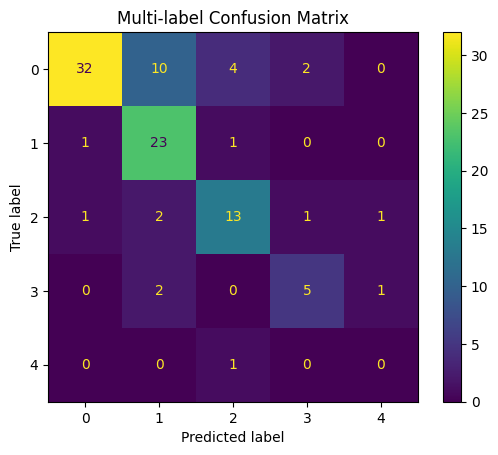

In [9]:
cm= confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Multi-label Confusion Matrix')
plt.show()

In [10]:
y_probs = mlc.predict_proba(X_test)

In [11]:
n_labels = y_test.shape[1]

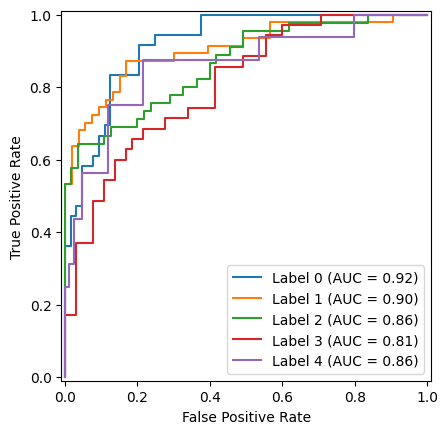

In [12]:
y_probs = mlc.predict_proba(X_test)
n_labels = y_test.shape[1]

for i in range(n_labels):
  probs = y_probs[i][:,1]
  fpr, tpr, thresholds = roc_curve(y_test[:,i], probs)
  auc = roc_auc_score(y_test[:,i], probs)
  RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc, estimator_name = f"Label {i}").plot(ax=plt.gca())